<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-05-17 14:09:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  36.4MB/s    in 4.0s    

2025-05-17 14:09:04 (37.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



/tmp/ipykernel_1846/2012091153.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DatabaseList'] = df_clean['DatabaseWantToWorkWith'].str.split(';')


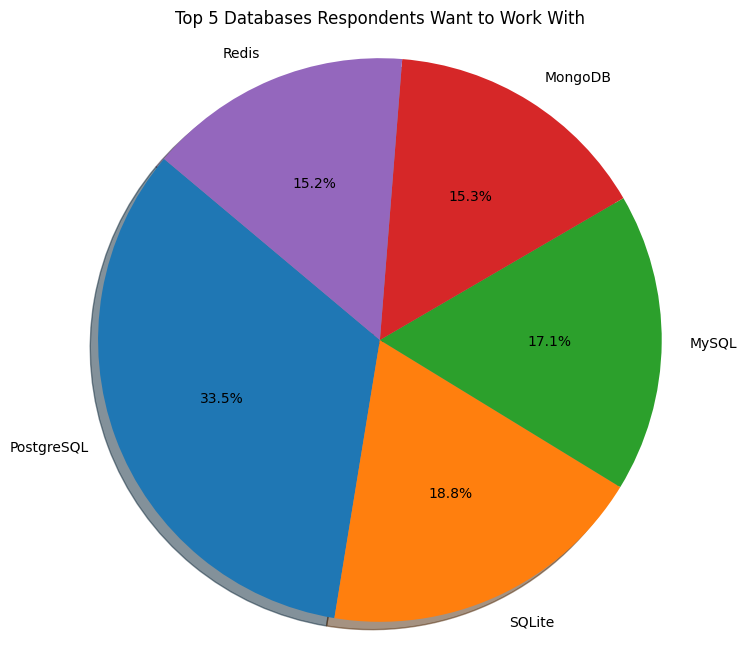

In [4]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (if not loaded yet)
df = pd.read_csv('survey-data.csv')

# Drop missing values in the 'DatabaseWantToWorkWith' column
df_clean = df.dropna(subset=['DatabaseWantToWorkWith'])

# The column might have multiple databases separated by semicolons; split and explode
df_clean['DatabaseList'] = df_clean['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_clean.explode('DatabaseList')

# Strip whitespace
df_exploded['DatabaseList'] = df_exploded['DatabaseList'].str.strip()

# Count occurrences of each database
database_counts = df_exploded['DatabaseList'].value_counts()

# Select top 5 databases
top5_databases = database_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top5_databases, labels=top5_databases.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top 5 Databases Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



/tmp/ipykernel_1846/3187917895.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DevTypeList'] = df_clean['DevType'].str.split(';')


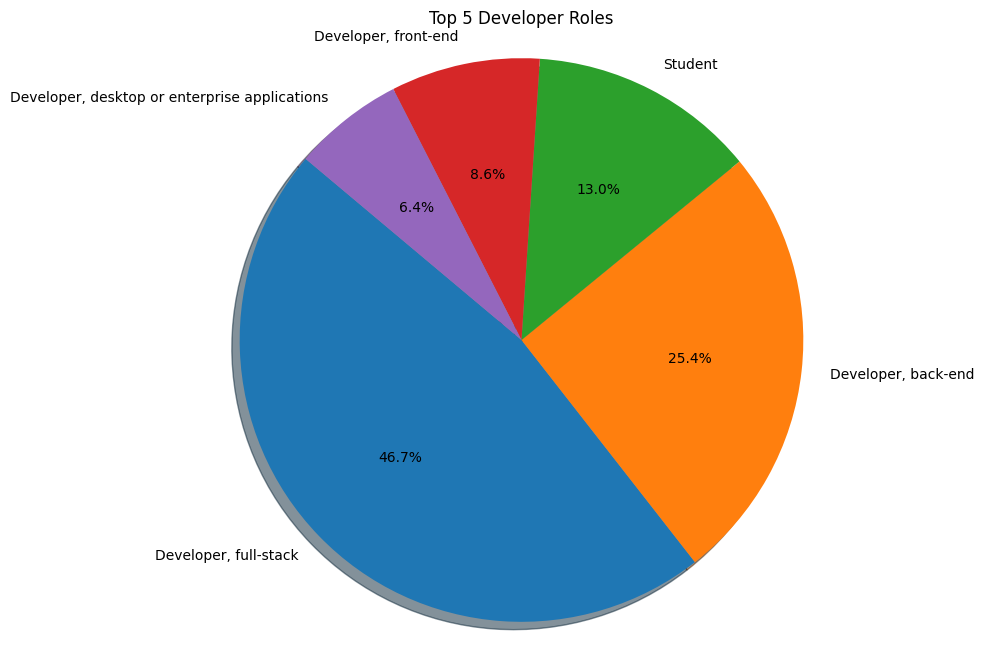

In [5]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data (if not loaded yet)
df = pd.read_csv('survey-data.csv')

# Drop rows with missing DevType
df_clean = df.dropna(subset=['DevType'])

# Split multiple roles separated by ';' and explode to separate rows
df_clean['DevTypeList'] = df_clean['DevType'].str.split(';')
df_exploded = df_clean.explode('DevTypeList')

# Strip whitespace
df_exploded['DevTypeList'] = df_exploded['DevTypeList'].str.strip()

# Count occurrences of each developer role
devtype_counts = df_exploded['DevTypeList'].value_counts()

# Select top 5 developer roles
top5_devtypes = devtype_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top5_devtypes, labels=top5_devtypes.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top 5 Developer Roles')
plt.axis('equal')  # Make pie chart circular
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



/tmp/ipykernel_1846/1107270928.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_os['OpSysList'] = df_os['OpSysProfessional use'].str.split(';')


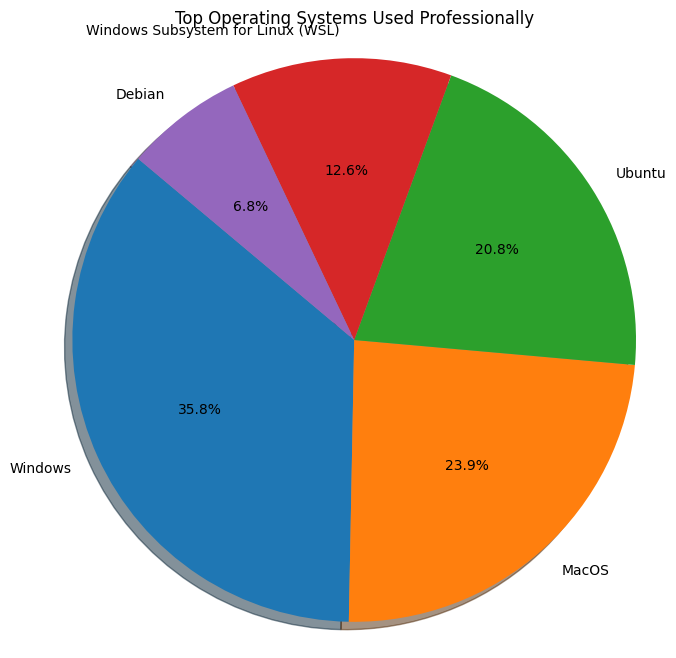

In [6]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded
# Drop rows with missing values in 'OpSysProfessional use'
df_os = df.dropna(subset=['OpSysProfessional use'])

# Split multiple OS entries separated by ';' and explode to separate rows
df_os['OpSysList'] = df_os['OpSysProfessional use'].str.split(';')
df_os_exploded = df_os.explode('OpSysList')

# Strip whitespace from OS names
df_os_exploded['OpSysList'] = df_os_exploded['OpSysList'].str.strip()

# Count occurrences of each OS
os_counts = df_os_exploded['OpSysList'].value_counts()

# Select top operating systems (top 5 for example)
top_os = os_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top_os, labels=top_os.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top Operating Systems Used Professionally')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



/tmp/ipykernel_1846/4227857995.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')


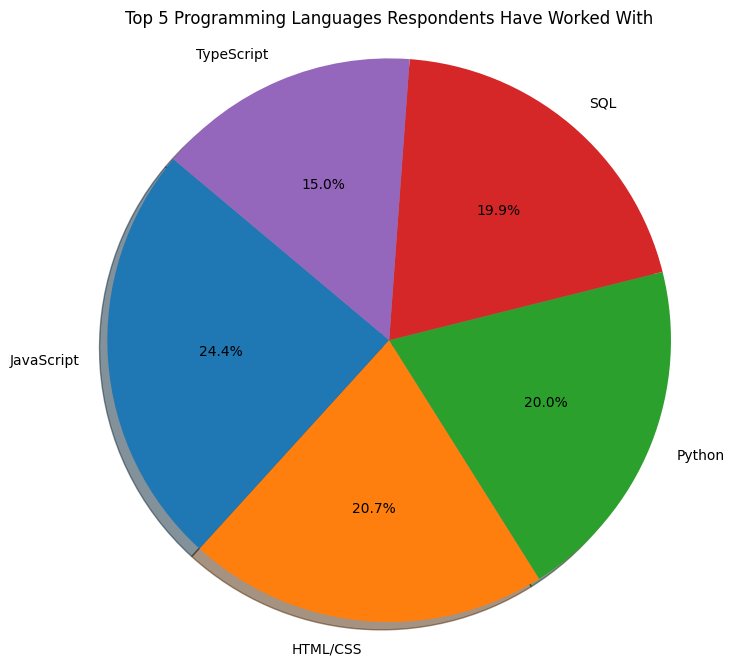

In [7]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in 'LanguageHaveWorkedWith'
df_lang = df.dropna(subset=['LanguageHaveWorkedWith'])

# Split multiple languages separated by ';' and explode into separate rows
df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang_exploded = df_lang.explode('LanguageList')

# Strip whitespace
df_lang_exploded['LanguageList'] = df_lang_exploded['LanguageList'].str.strip()

# Count occurrences of each language
language_counts = df_lang_exploded['LanguageList'].value_counts()

# Select top 5 languages
top_languages = language_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top_languages, labels=top_languages.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top 5 Programming Languages Respondents Have Worked With')
plt.axis('equal')  # Make pie chart circular
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



/tmp/ipykernel_1846/4048905720.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tools['ToolList'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')


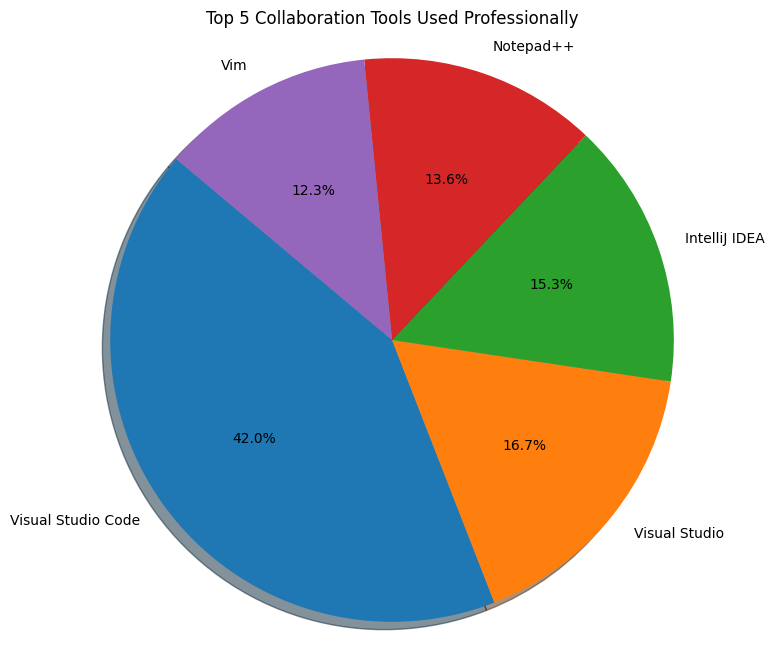

In [8]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in NEWCollabToolsHaveWorkedWith
df_tools = df.dropna(subset=['NEWCollabToolsHaveWorkedWith'])

# Split multiple tools separated by ';' and explode into separate rows
df_tools['ToolList'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_tools_exploded = df_tools.explode('ToolList')

# Strip whitespace
df_tools_exploded['ToolList'] = df_tools_exploded['ToolList'].str.strip()

# Count occurrences of each tool
tool_counts = df_tools_exploded['ToolList'].value_counts()

# Select top 5 collaboration tools
top_tools = tool_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top_tools, labels=top_tools.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top 5 Collaboration Tools Used Professionally')
plt.axis('equal')  # Make pie chart circular
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



/tmp/ipykernel_1846/1032231561.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_admired['AdmiredList'] = df_admired['LanguageAdmired'].str.split(';')


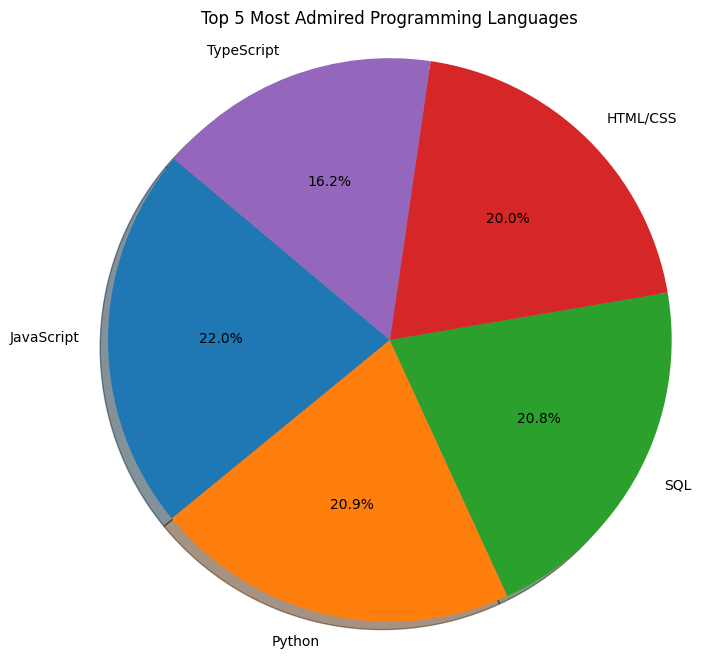

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows where LanguageAdmired is missing
df_admired = df.dropna(subset=['LanguageAdmired'])

# Split the semicolon-separated values and explode the list into rows
df_admired['AdmiredList'] = df_admired['LanguageAdmired'].str.split(';')
df_admired_exploded = df_admired.explode('AdmiredList')

# Strip whitespace from each language
df_admired_exploded['AdmiredList'] = df_admired_exploded['AdmiredList'].str.strip()

# Count the frequency of each language
admired_counts = df_admired_exploded['AdmiredList'].value_counts()

# Select the top 5 admired languages
top_admired = admired_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(top_admired, labels=top_admired.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top 5 Most Admired Programming Languages')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



/tmp/ipykernel_1846/1580596410.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tools['ToolList'] = df_tools['AIToolCurrently Using'].str.split(';')


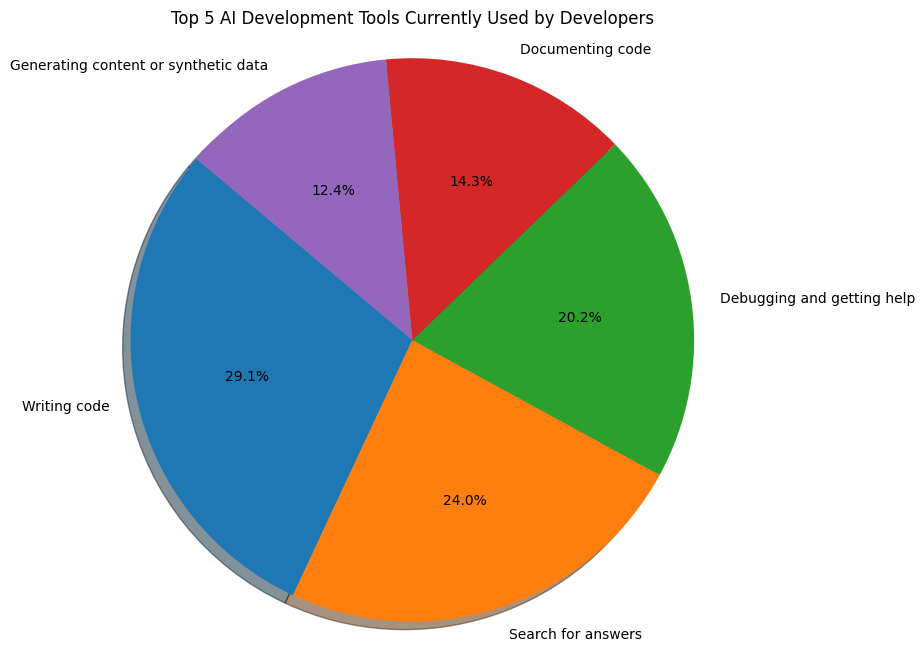

In [10]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows where AIToolCurrently Using is missing
df_tools = df.dropna(subset=['AIToolCurrently Using'])

# Split the semicolon-separated values and explode the list into rows
df_tools['ToolList'] = df_tools['AIToolCurrently Using'].str.split(';')
df_tools_exploded = df_tools.explode('ToolList')

# Strip whitespace from each tool name
df_tools_exploded['ToolList'] = df_tools_exploded['ToolList'].str.strip()

# Count the frequency of each tool
tool_counts = df_tools_exploded['ToolList'].value_counts()

# Select the top 5 tools
top_tools = tool_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(top_tools, labels=top_tools.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top 5 AI Development Tools Currently Used by Developers')
plt.axis('equal')  # Equal aspect ratio for circular pie
plt.show()


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



/tmp/ipykernel_1846/3022469437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_webframe['FrameworkList'] = df_webframe['WebframeWantToWorkWith'].str.split(';')


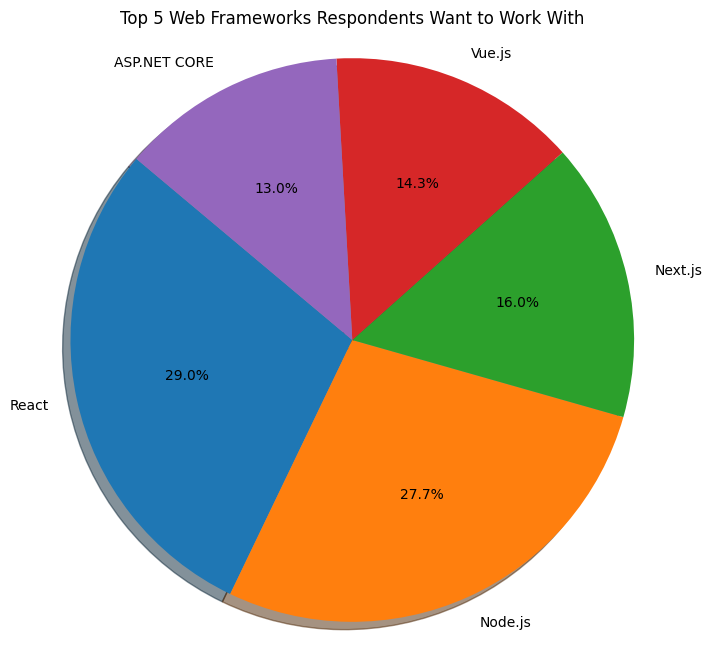

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows where WebframeWantToWorkWith is missing
df_webframe = df.dropna(subset=['WebframeWantToWorkWith'])

# Split the semicolon-separated values and explode
df_webframe['FrameworkList'] = df_webframe['WebframeWantToWorkWith'].str.split(';')
df_webframe_exploded = df_webframe.explode('FrameworkList')

# Strip whitespace
df_webframe_exploded['FrameworkList'] = df_webframe_exploded['FrameworkList'].str.strip()

# Count the frequency of each framework
framework_counts = df_webframe_exploded['FrameworkList'].value_counts()

# Select top 5 frameworks
top_frameworks = framework_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top_frameworks, labels=top_frameworks.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top 5 Web Frameworks Respondents Want to Work With')
plt.axis('equal')
plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



/tmp/ipykernel_1846/596993200.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_embedded['EmbeddedList'] = df_embedded['EmbeddedWantToWorkWith'].str.split(';')


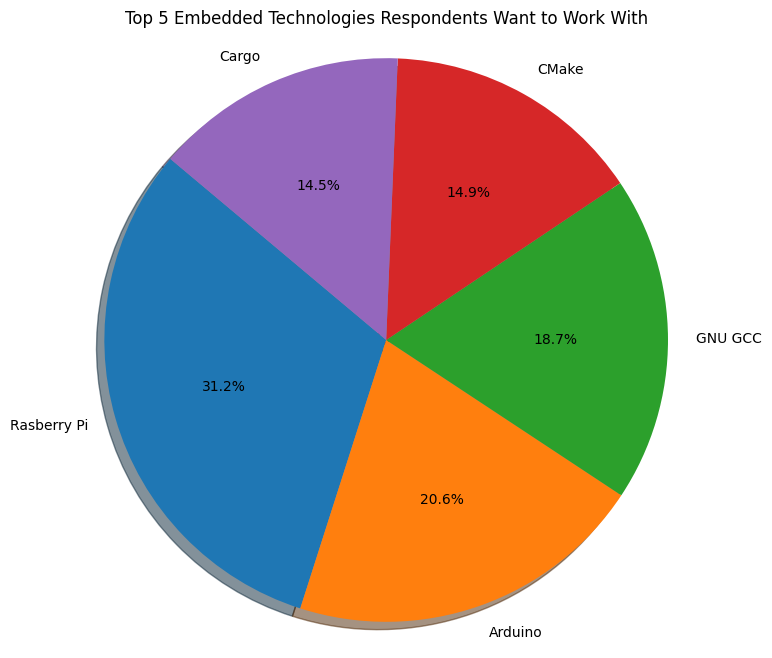

In [12]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows where EmbeddedWantToWorkWith is missing
df_embedded = df.dropna(subset=['EmbeddedWantToWorkWith'])

# Split the semicolon-separated values and explode
df_embedded['EmbeddedList'] = df_embedded['EmbeddedWantToWorkWith'].str.split(';')
df_embedded_exploded = df_embedded.explode('EmbeddedList')

# Strip whitespace
df_embedded_exploded['EmbeddedList'] = df_embedded_exploded['EmbeddedList'].str.strip()

# Count the frequency of each embedded technology
embedded_counts = df_embedded_exploded['EmbeddedList'].value_counts()

# Select top 5 embedded technologies
top_embedded = embedded_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top_embedded, labels=top_embedded.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Top 5 Embedded Technologies Respondents Want to Work With')
plt.axis('equal')
plt.show()


### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
